In [2]:
import warnings
warnings.filterwarnings('ignore')
## for data
import numpy as np
import pandas as pd
import math

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## for statistical tests
import scipy

# Pretty display for notebooks
%matplotlib inline

In [3]:
# Load the  housing dataset
data = pd.read_csv('/content/housing-full.csv')
print ('Housing dataset has {0} data points with {1} variables each'.format(*data.shape))
data.head()

Housing dataset has 506 data points with 14 variables each


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



**Data Set Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV (target)     Median value of owner-occupied homes in $1000's

In [4]:
prices = data['medv']
features = data.drop('medv', axis = 1)

X= features.values
y = prices.values

### Data Exploration

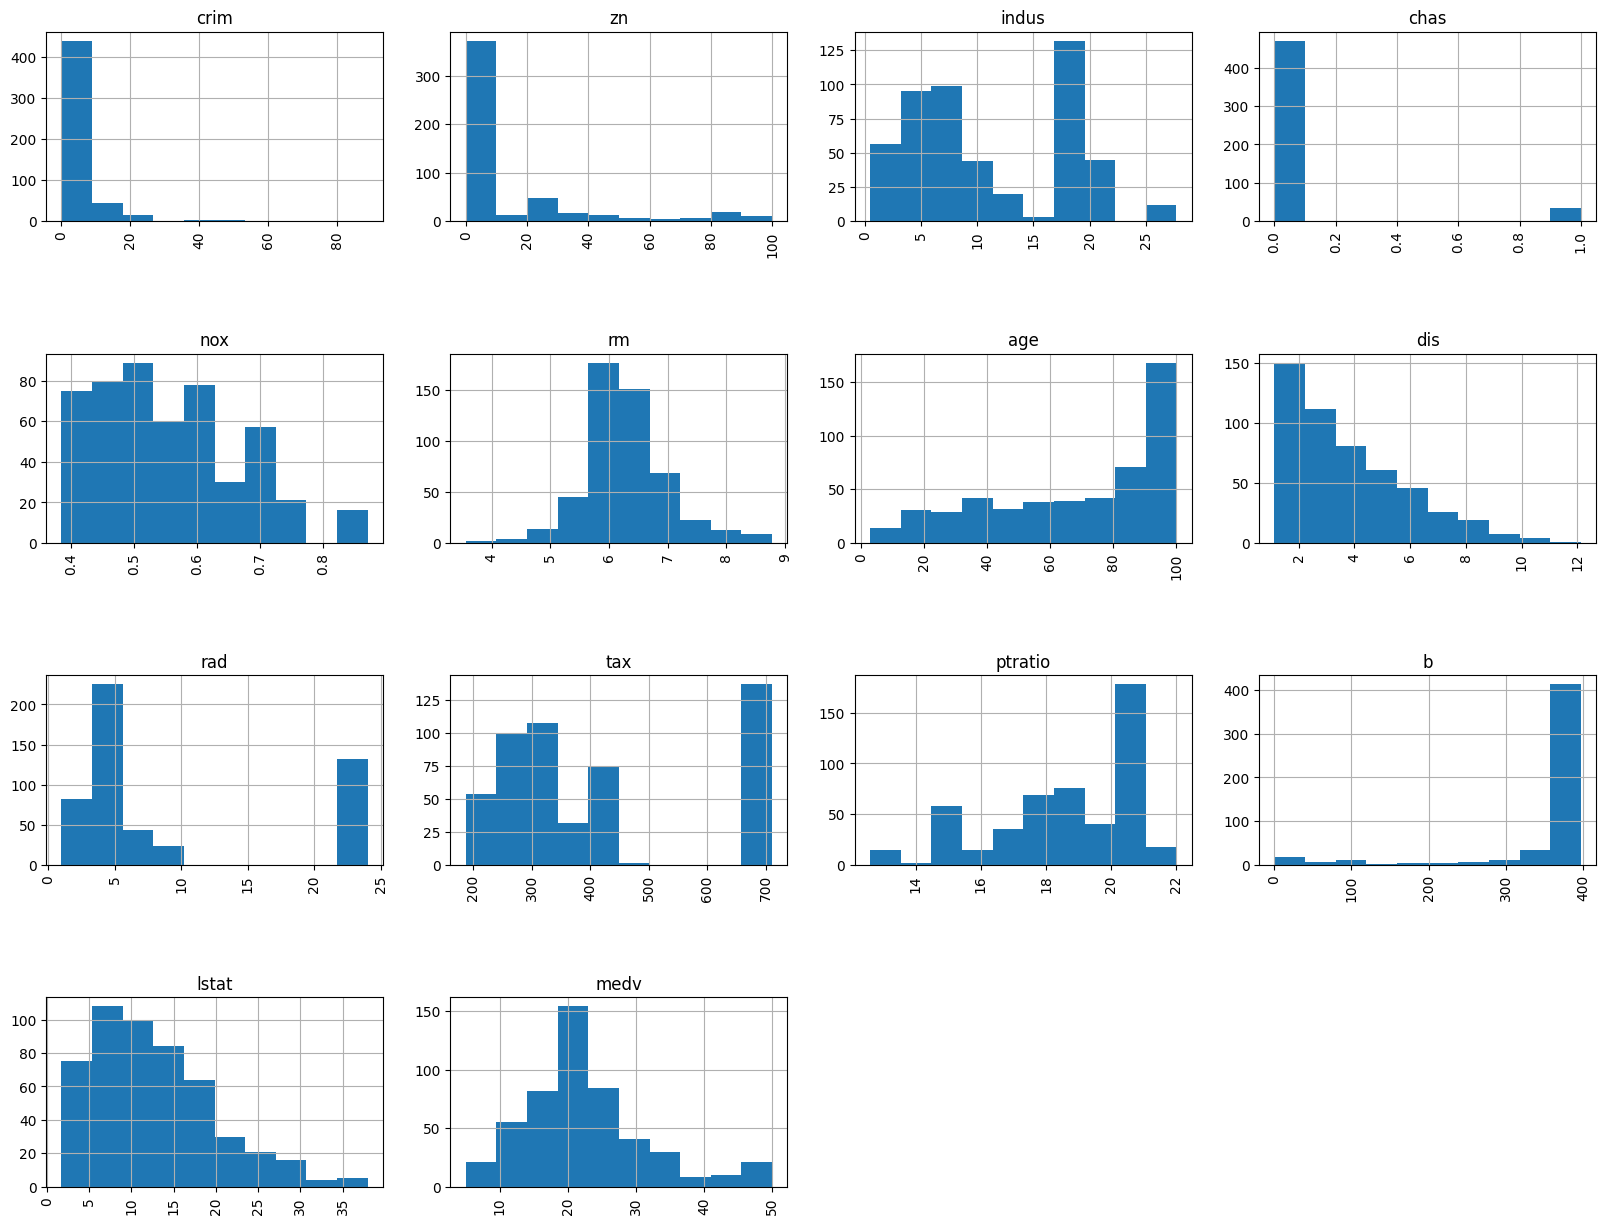

In [5]:
import matplotlib.pyplot as plt
import math

fig = plt.figure(figsize=(20, 15))
cols = 4
rows = math.ceil(float(data.shape[1]) / cols)

for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)

    if data.dtypes[column] == object:
        data[column].value_counts().plot(kind="bar", ax=ax)
    else:
        data[column].hist(ax=ax)
        plt.xticks(rotation="vertical")

plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

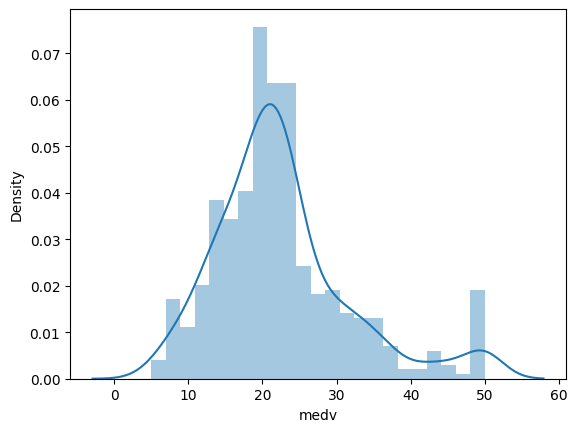

In [6]:
#distribution for the target
sns.distplot(prices);

التوزيع في الرسم البياني الأخير، الذي يمثل سعر المنزل (medv)، يميل إلى أن يكون توزيعًا طبيعيًا إلى حد ما، ولكنه منحرف قليلاً إلى اليمين. هذا يعني أن معظم قيم الأسعار تتركز حول المتوسط، ولكن هناك بعض القيم المرتفعة نسبيًا التي تمتد نحو اليمين.

Data Visualization

**Question** fit your data using `PCA` with `n_components=2`, transform `X` to 2 dimentional array (`principalComponents` )

In [7]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X) # Note: PCA does not require y for fitting
X_2D = model.transform(X) #Transform the data to 2D


#Convert to a DataFrame
principalDf = pd.DataFrame(X_2D, columns=['principal component 1', 'principal component 2'])

#Concatenate with target variable (prices)
finalDf = pd.concat([principalDf, prices.reset_index(drop=True)], axis=1)

finalDf.rename(columns={'medv': 'target'}, inplace=True)  # Rename for clarity
#Show explained variance ratio
print("Explained variance ratio:", model.explained_variance_ratio_)

Explained variance ratio: [0.80582318 0.16305197]


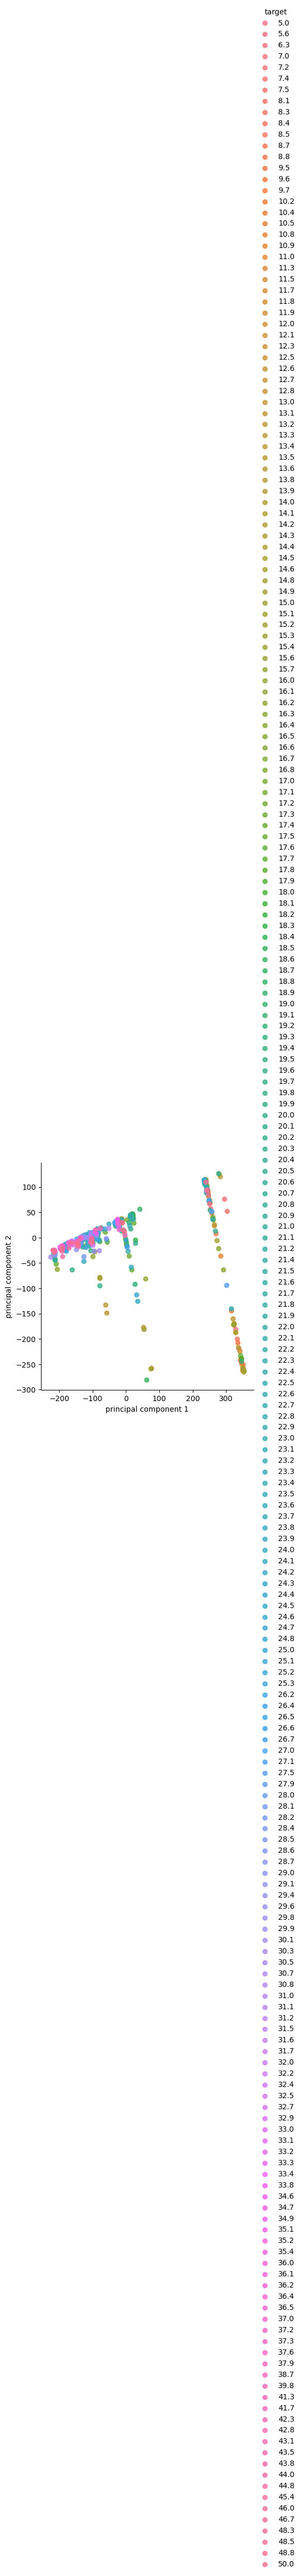

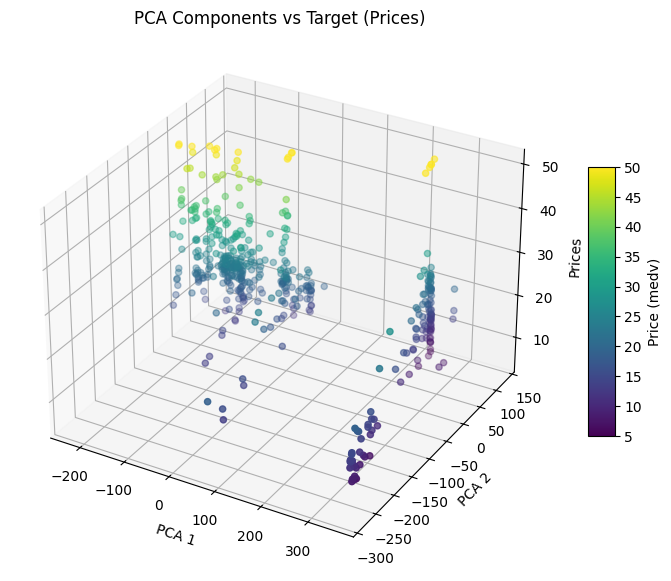

In [8]:
# Scatter plot with hue
sns.lmplot(
    x="principal component 1",
    y="principal component 2",
    hue='target',
    data=finalDf,
    fit_reg=False
)

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')  # type: Axes3D

x_ax = finalDf['principal component 1']
y_ax = finalDf['principal component 2']
z_ax = prices.values.astype(float)

# Scatter plot with color based on price
scatter = ax.scatter(x_ax, y_ax, z_ax, c=z_ax, cmap='viridis', marker='o')  # type: ignore

# Labels
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Prices')  # Now safe with Axes3D import

# Optional: Add a color bar
cbar = fig.colorbar(scatter, shrink=0.5, aspect=10)
cbar.set_label('Price (medv)')

plt.title("PCA Components vs Target (Prices)")
plt.show()

الرسم البياني الأخير هو رسم بياني مبعثر (scatter plot) ثلاثي الأبعاد (3D) يوضح العلاقة بين مكونات PCA الرئيسية (Principal Components) وسعر المنزل (Prices).

كيف تقرأ الرسم البياني:

المحاور:

المحور السيني (X-axis): يمثل المكون الرئيسي الأول لـ PCA ("PCA 1"). هذا المكون يمثل أكبر قدر من التباين في البيانات الأصلية.
المحور الصادي (Y-axis): يمثل المكون الرئيسي الثاني لـ PCA ("PCA 2"). هذا المكون يمثل ثاني أكبر قدر من التباين في البيانات الأصلية، ويكون متعامدًا (orthogonal) مع المكون الأول.
المحور العيني (Z-axis): يمثل سعر المنزل (Prices)، وهي القيمة التي نحاول التنبؤ بها.
النقاط: كل نقطة في الرسم البياني تمثل منزلًا واحدًا في مجموعة البيانات.

اللون: لون كل نقطة يمثل سعر المنزل المقابل لها. يتراوح اللون من الأرجواني الداكن (الأسعار المنخفضة) إلى الأصفر الفاتح (الأسعار المرتفعة) وفقًا لشريط الألوان على الجانب الأيمن.

شرح النتائج:

التبسيط: الهدف من PCA هو تقليل أبعاد البيانات مع الحفاظ على أكبر قدر ممكن من المعلومات (التباين). في هذا الرسم البياني، تم تبسيط البيانات الأصلية ذات الـ 13 ميزة إلى بعدين فقط (PCA 1 و PCA 2) بينما يتم عرضها مقابل البعد الثالث (السعر).

توزيع البيانات: يوضح الرسم البياني كيف تتوزع نقاط البيانات في هذا الفضاء ثلاثي الأبعاد المبسط. يمكنك ملاحظة كيف تتجمع النقاط التي لها أسعار متشابهة معًا.

العلاقة مع السعر: من خلال فحص كيف يتغير لون النقاط (الأسعار) مع تغير قيم PCA 1 و PCA 2، يمكنك الحصول على فكرة عن كيفية تأثير المكونين الرئيسيين على سعر المنزل. على سبيل المثال:

إذا لاحظت أن النقاط ذات اللون الأصفر الفاتح (الأسعار المرتفعة) تتجمع في منطقة معينة من الرسم البياني بينما تتجمع النقاط ذات اللون الأرجواني الداكن (الأسعار المنخفضة) في منطقة أخرى، فهذا يشير إلى أن المكونين الرئيسيين (أو مزيج منهما) مرتبطان بسعر المنزل.
قد لا تكون العلاقة خطية تمامًا، ولكن PCA تساعد في تحديد الاتجاهات الرئيسية في البيانات.
التباين المفسر: في المخرجات السابقة، تم عرض "Explained variance ratio". هذه القيمة توضح النسبة المئوية من التباين الكلي في البيانات الأصلية التي تم تفسيرها بواسطة كل مكون رئيسي. مجموع نسبة التباين المفسر للمكون الأول والثاني يعطيك فكرة عن مدى جودة هذين المكونين في تمثيل البيانات الأصلية. إذا كانت النسبة المفسرة عالية (مثلًا أكثر من 70-80%)، فهذا يعني أن المكونين الرئيسيين يمثلان بشكل جيد جزءًا كبيرًا من المعلومات في البيانات.

### Developing a Model

Define a Performance Metric

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `mean_squared_error` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`
- print the results.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and prints the performance score between
        true and predicted values based on two metrics:
        Mean Squared Error (MSE) and R² (R-squared). """

    # Calculate MSE and R² score
    mse = mean_squared_error(y_true, y_predict)
    r2 = r2_score(y_true, y_predict)

    # Print the results
    print(f"\tMean Squared Error (MSE): {mse:.4f}")
    print(f"\tR² Score: {r2:.4f}")

    # Optionally return the scores for further use
    return {"mse": mse, "r2": r2}

Implementation: Shuffle and Split Data
Your next implementation requires that you take the housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

Use train_test_split from sklearn.model_selection to shuffle and split the features and prices data into training and testing sets.
Split the data into 80% training and 20% testing.
Set the random_state for train_test_split to a value of 10. This ensures results are consistent.
Assign the train and testing splits to X_train, X_test, y_train, and y_test.

In [10]:
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
# Split into 80% train, 20% test; set random_state=10
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,       # 20% for testing
    random_state=10      # Seed for reproducibility
)

# Success message
print("Training and testing split was successful.")
print("X_train:\n", X_train)
print("y_train:\n", y_train)

Training and testing split was successful.
X_train:
 [[8.87300e-02 2.10000e+01 5.64000e+00 ... 1.68000e+01 3.95560e+02
  1.34500e+01]
 [1.35222e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.31420e+02
  1.33300e+01]
 [1.61282e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 2.48310e+02
  2.03400e+01]
 ...
 [2.37857e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.70730e+02
  1.33400e+01]
 [1.69020e-01 0.00000e+00 2.56500e+01 ... 1.91000e+01 3.85020e+02
  1.48100e+01]
 [7.61620e-01 2.00000e+01 3.97000e+00 ... 1.30000e+01 3.92400e+02
  1.04500e+01]]
y_train:
 [19.7 23.1 13.5 21.2 23.1 13.6 22.8 18.2 13.1 23.2 22.8 25.1 18.9 10.9
 19.3 17.4 15.6 20.6 50.  32.7 21.8 13.4 16.6 23.6 11.  23.8 23.1 33.2
 28.2  8.5 32.4 29.6 17.1 24.2 26.4 33.2 10.5  8.8 28.  10.5 15.4 15.3
 10.4 15.7 43.1 24.7 21.  19.4 10.9 21.7 38.7 19.2 12.  17.5 23.9  9.7
 15.4 26.5 10.8 12.7 18.4 15.2 29.8 20.  23.8 14.6 19.8 10.2 23.7 18.7
 20.3 50.  25.  14.8  9.5 33.  19.4 15.6 20.2 21.7 24.7 19.5  7.2 31.7
 22.4 14.1 21.4 21.

عند تقسيم مجموعة بيانات صغيرة إلى مجموعات تدريب و testing ، قد تواجه عدة مشاكل تؤثر على موثوقية النموذج وتقييم الأداء . إليك أبرز ما قد يسوء:

❌ المشاكل المحتملة عند تقسيم مجموعة بيانات صغيرة:
الانحياز العشوائي (Random Variance)
إذا كانت البيانات قليلة جداً، فإن الطريقة التي تقسم بها البيانات (train/test) قد تؤدي إلى:
مجموعات تدريب غير تمثيلية.
مجموعات اختبار تحتوي على عينات نادرة أو غير متوازنة.
هذا يؤدي إلى نتائج غير مستقرة أو مبالغ فيها .
فقدان المعلومات المهمة
عند فصل جزء كبير للـ testing (مثلاً 20%) من مجموعة بيانات صغيرة، قد تُفقد أنماط أو خصائص مهمة في التدريب، مما يؤثر على أداء النموذج.
تقلبات كبيرة في القياسات (High Variance in Performance)
مع كل تشغيلة مختلفة لتقسيم البيانات، قد تحصل على قيم مختلفة بشكل كبير لمقاييس الأداء مثل MSE أو R².
زيادة احتمالية الخطأ الإحصائي
مع عدد قليل من العينات، لا يمكن الاعتماد على المتوسط كمقياس دقيق للأداء.
✅ الحلول والبدائل:
🔁 1. استخدام Cross-Validation (K-Fold Validation)
بدلاً من تقسيم واحد فقط (مثل 80/20)، يتم تقسيم البيانات إلى K أجزاء (folds) ، ويتم التدريب والاختبار عدة مرات على أجزاء مختلفة، ثم يتم توحيد النتائج .

مثال: K-Fold Cross Validation

الفوائد:
استغلال جميع البيانات لكل من التدريب والاختبار.
تقليل التباين في قياس الأداء.
أكثر دقة في تقييم النموذج على بيانات قليلة.
🔄 2. Stratified K-Fold (للتصنيف فقط)
يحافظ على توزيع الفئات في كل fold.
مفيد إذا كنت تعمل على تصنيف وليس انحدار.
🧪 3. Leave-One-Out Cross Validation (LOO-CV)
طريقة شديدة الاستنزاف حسابياً لكنها دقيقة.
تستخدم عندما تكون البيانات محدودة جداً (مثلاً أقل من 50 عينة).
في كل تكرار، يتم استخدام عينة واحدة فقط للtesting والباقي للتدريب.

Training and testing basic fucntion

For the code cell below, you will need to implement the following function:

Use X_train and y_train to fit the model.
test your model and print the result on both of training and test data using performance_metric function.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def fit_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Fits a model on training data, evaluates it on both training and testing sets,
    and prints out performance metrics using the performance_metric function.
    """

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate on training set
    print("Training Set Performance:")
    performance_metric(y_train, y_train_pred)

    # Evaluate on testing set
    print("\nTesting Set Performance:")
    performance_metric(y_test, y_test_pred)

    # Optional: Evaluate on full dataset (if y is the full target)
    print("\nFull Dataset Prediction Performance (using test predictions):")
    try:
        performance_metric(y, y_test_pred)  # Only works if y == y_test
    except ValueError as e:
        print("⚠️ Warning: Cannot compare y_test_pred with full y unless shapes match.")

    # Optional: return predictions or metrics
    return y_train_pred, y_test_pred

In [12]:
# Create model
model = LinearRegression()

### Baseline Model: LinearRegression

Use fit_and_eval_model to fit and evalute simple LinearRegression as a baseline model,

In [13]:
# Call the evaluation function
metrics = fit_and_evaluate_model(model, X_train, X_test, y_train, y_test)

Training Set Performance:
	Mean Squared Error (MSE): 19.2309
	R² Score: 0.7501

Testing Set Performance:
	Mean Squared Error (MSE): 34.4140
	R² Score: 0.6709

Full Dataset Prediction Performance (using test predictions):
⚠️ Warning: Cannot compare y_test_pred with full y unless shapes match.


Question- Evaluating the Model Results
looking at the results, how do you know that the model is underfitting? what are your options to make it better (in general)

✅ ما هو Underfitting؟
الـ Underfitting يحدث عندما:

لا يتعلم النموذج جيدًا من بيانات التدريب.
يكون أداءه ضعيفًا على كلتا المجموعتين : التدريب والاختبار.
🔍 كيف نعرف أن النموذج مصاب بـ Underfitting من هذه النتائج؟
إليك المؤشرات التي تدل على ذلك:
R² على التدريب ليس مرتفعًا جدًا (0.75 فقط)
هذا يعني أن النموذج لم يتعلم الأنماط بشكل كامل.
لو كان أعلى (مثلاً > 0.9)، لقلنا إنه يتعلم جيدًا على التدريب.
انخفاض R² عند الاختبار (0.67)
هناك انخفاض واضح بين التدريب والاختبار، لكنه ليس فرقًا كبيرًا جدًا.
يشير إلى أن النموذج ليس قويًا بما فيه الكفاية الأنماط في البيانات.
ارتفاع MSE على الاختبار
الزيادة في الخطأ تعني أن التنبؤات أقل دقة على بيانات جديدة.
✅ الاستنتاج:
النموذج يُعاني من underfitting جزئي — أي أنه لا يملك القدرة الكافية لالتقاط العلاقات المعقدة في البيانات.

Feature selection
apply feature selection using RFE, use LinearRegression as your estimator, where the n_features_to_select is 6

print how many features left
fit and evaluate using the seleced featues.
did the model imporve? does it under or over fit?

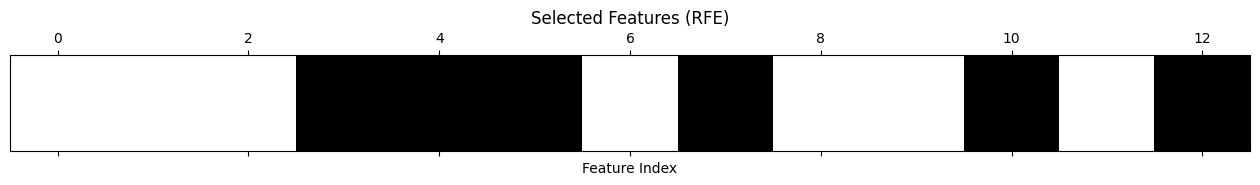

Number of features left: 6

Performance Before Feature Selection:
	Mean Squared Error (MSE): 34.4140
	R² Score: 0.6709

Performance After Feature Selection:
	Mean Squared Error (MSE): 30.9323
	R² Score: 0.7042

Train R²: 0.7079, Test R²: 0.7042
→ Model is Balanced


In [14]:
from sklearn.feature_selection import RFE
# Initialize RFE with Linear Regression to select 6 features
select = RFE(model, n_features_to_select=6)

# Fit RFE on training data
select.fit(X_train, y_train)

# Plot the mask of selected features
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks(())
plt.title("Selected Features (RFE)")
plt.show()

# Transform train and test sets to selected features
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)

# Print how many features are left
print("Number of features left:", X_train_selected.shape[1])

# Train a new model on selected features
lr = LinearRegression()  # ✅ Use max_iter instead of max_iteration
lr.fit(X_train_selected, y_train)

# Predict on train and test sets
y_train_pred = lr.predict(X_train_selected)
y_test_pred = lr.predict(X_test_selected)

# Evaluate performance
print("\nPerformance Before Feature Selection:")
performance_metric(y_test, model.predict(X_test))  # Original model

print("\nPerformance After Feature Selection:")
metrics = performance_metric(y_test, y_test_pred)  # Now y_test_pred is defined

# Check for underfitting or overfitting
train_score = r2_score(y_train, y_train_pred)
test_score = metrics['r2']

print(f"\nTrain R²: {train_score:.4f}, Test R²: {test_score:.4f}")

if train_score > 0.9 and test_score < train_score * 0.9:
    print("→ Possible Overfitting")
elif train_score < 0.6 and test_score < 0.6:
    print("→ Underfitting")
else:
    print("→ Model is Balanced")

In [46]:
# score =LinearRegression().fit(X_train_selected, y_train).score(X_test_selected, y_test)
# print("Test score: {:.3f}".format(score))

Test score: 0.704


In [15]:
features.columns[select.get_support()]

Index(['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat'], dtype='object')

In [16]:
fit_and_evaluate_model(LinearRegression(),X_train_selected , X_test_selected, y_train, y_test)

Training Set Performance:
	Mean Squared Error (MSE): 22.4810
	R² Score: 0.7079

Testing Set Performance:
	Mean Squared Error (MSE): 30.9323
	R² Score: 0.7042

Full Dataset Prediction Performance (using test predictions):
⚠️ Warning: Cannot compare y_test_pred with full y unless shapes match.


(array([20.90994652, 12.69913684, 14.71105828, 22.74439172, 22.25540459,
        17.35109121, 29.21555375, 14.67952771, 14.6006803 , 20.55925043,
        27.22299666, 29.55714015, 23.5537786 , 16.65527171, 15.99656653,
        18.72901537, 17.78466592, 20.15137322, 33.34266081, 31.28069789,
        20.84498051, 13.65696346, 16.13660736, 28.68029447, 14.54657843,
        25.19631291, 24.48595185, 32.89517209, 29.54510197,  8.68688983,
        34.68019711, 26.27560169, 15.31356312, 26.53721134, 27.94601056,
        34.14983626,  5.05218609, 14.41410883, 28.35209689, 11.84838747,
        16.10127998, 21.06407838,  8.54840675, 11.91294309, 35.18466334,
        24.62385153, 23.20265428, 23.88240828, 18.99075428, 20.7217498 ,
        36.42763672, 20.84286861, 10.28325556, 19.66468462, 25.2120758 ,
         7.69046058, 14.69364496, 26.36685785, 10.90364196, 14.0318265 ,
        16.53224119, 17.46678739, 32.48322725, 24.18084923, 25.73250257,
         7.39136821, 24.80034835,  4.27648105, 28.1

-More Complex Model: Pipline
train your model with LinearRegression using the following pipline:



###feature selection
###MinMaxScaler
###PolynomialFeatures with degree=2
###LinearRegression

In [17]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

# Build the pipeline
pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    MinMaxScaler(),
    LinearRegression()
)

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_test_pred = pipeline.predict(X_test)

# Evaluate performance
fit_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Optional: Plot prediction curve — only if using ONE feature
if X_train.shape[1] == 1:
    X_plot = np.linspace(X_train.min(), X_train.max(), 500).reshape(-1, 1)
    y_plot = pipeline.predict(X_plot)

    plt.scatter(X_train, y_train, color='black', label='Training Data')
    plt.plot(X_plot, y_plot, color='blue', label='Polynomial Fit (Degree=2)')
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Polynomial Regression with Pipeline")
    plt.legend()
    plt.show()
else:
    print("⚠️ Skipping plot: Can't plot multi-feature regression directly.")

Training Set Performance:
	Mean Squared Error (MSE): 5.2393
	R² Score: 0.9319

Testing Set Performance:
	Mean Squared Error (MSE): 13.0729
	R² Score: 0.8750

Full Dataset Prediction Performance (using test predictions):
⚠️ Warning: Cannot compare y_test_pred with full y unless shapes match.
⚠️ Skipping plot: Can't plot multi-feature regression directly.


In [18]:
full_pipeline = make_pipeline(
    RFE(LinearRegression(), n_features_to_select=6),
    PolynomialFeatures(degree=2),
    MinMaxScaler(),
    LinearRegression()
)

full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=LinearRegression(), n_features_to_select=6)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [19]:
full_pipeline.fit(X_train, y_train)
y_test_pred = full_pipeline.predict(X_test)

In [20]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create full pipeline with RFE
pipeline = make_pipeline(
    RFE(LinearRegression(), n_features_to_select=6),  # Select top 6 features
    PolynomialFeatures(degree=2, include_bias=False),
    MinMaxScaler(),
    LinearRegression()
)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test set
y_test_pred = pipeline.predict(X_test)

# Evaluate performance manually using fit_and_evaluate_model
fit_and_evaluate_model(pipeline, X_train, X_test, y_train, y_test)

# Calculate and print R² score directly
test_r2 = pipeline.score(X_test, y_test)
train_r2 = pipeline.score(X_train, y_train)

print("\nModel R² Scores:")
print(f"Train R²: {train_r2:.4f}")
print(f"Test  R²: {test_r2:.4f}")

Training Set Performance:
	Mean Squared Error (MSE): 11.2323
	R² Score: 0.8541

Testing Set Performance:
	Mean Squared Error (MSE): 14.9874
	R² Score: 0.8567

Full Dataset Prediction Performance (using test predictions):
⚠️ Warning: Cannot compare y_test_pred with full y unless shapes match.

Model R² Scores:
Train R²: 0.8541
Test  R²: 0.8567


إذا كان
train_r2
مرتفعًا (>0.9) و
test_r2
منخفضًا (< train_r2 × 0.8):
يوجد
Overfitting
إذا كان
train_r2 < 0.7
و
test_r2
قريب منه
يوجد
Underfitting

إذا كان كلاهما مرتفعين ➜ النموذج
جيد ومُوازن


In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R² Scores:", cv_scores)
print("Average CV R² Score:", cv_scores.mean())

Cross-Validation R² Scores: [0.77498949 0.85987791 0.8046847  0.68862759 0.66900826]
Average CV R² Score: 0.7594375900529592


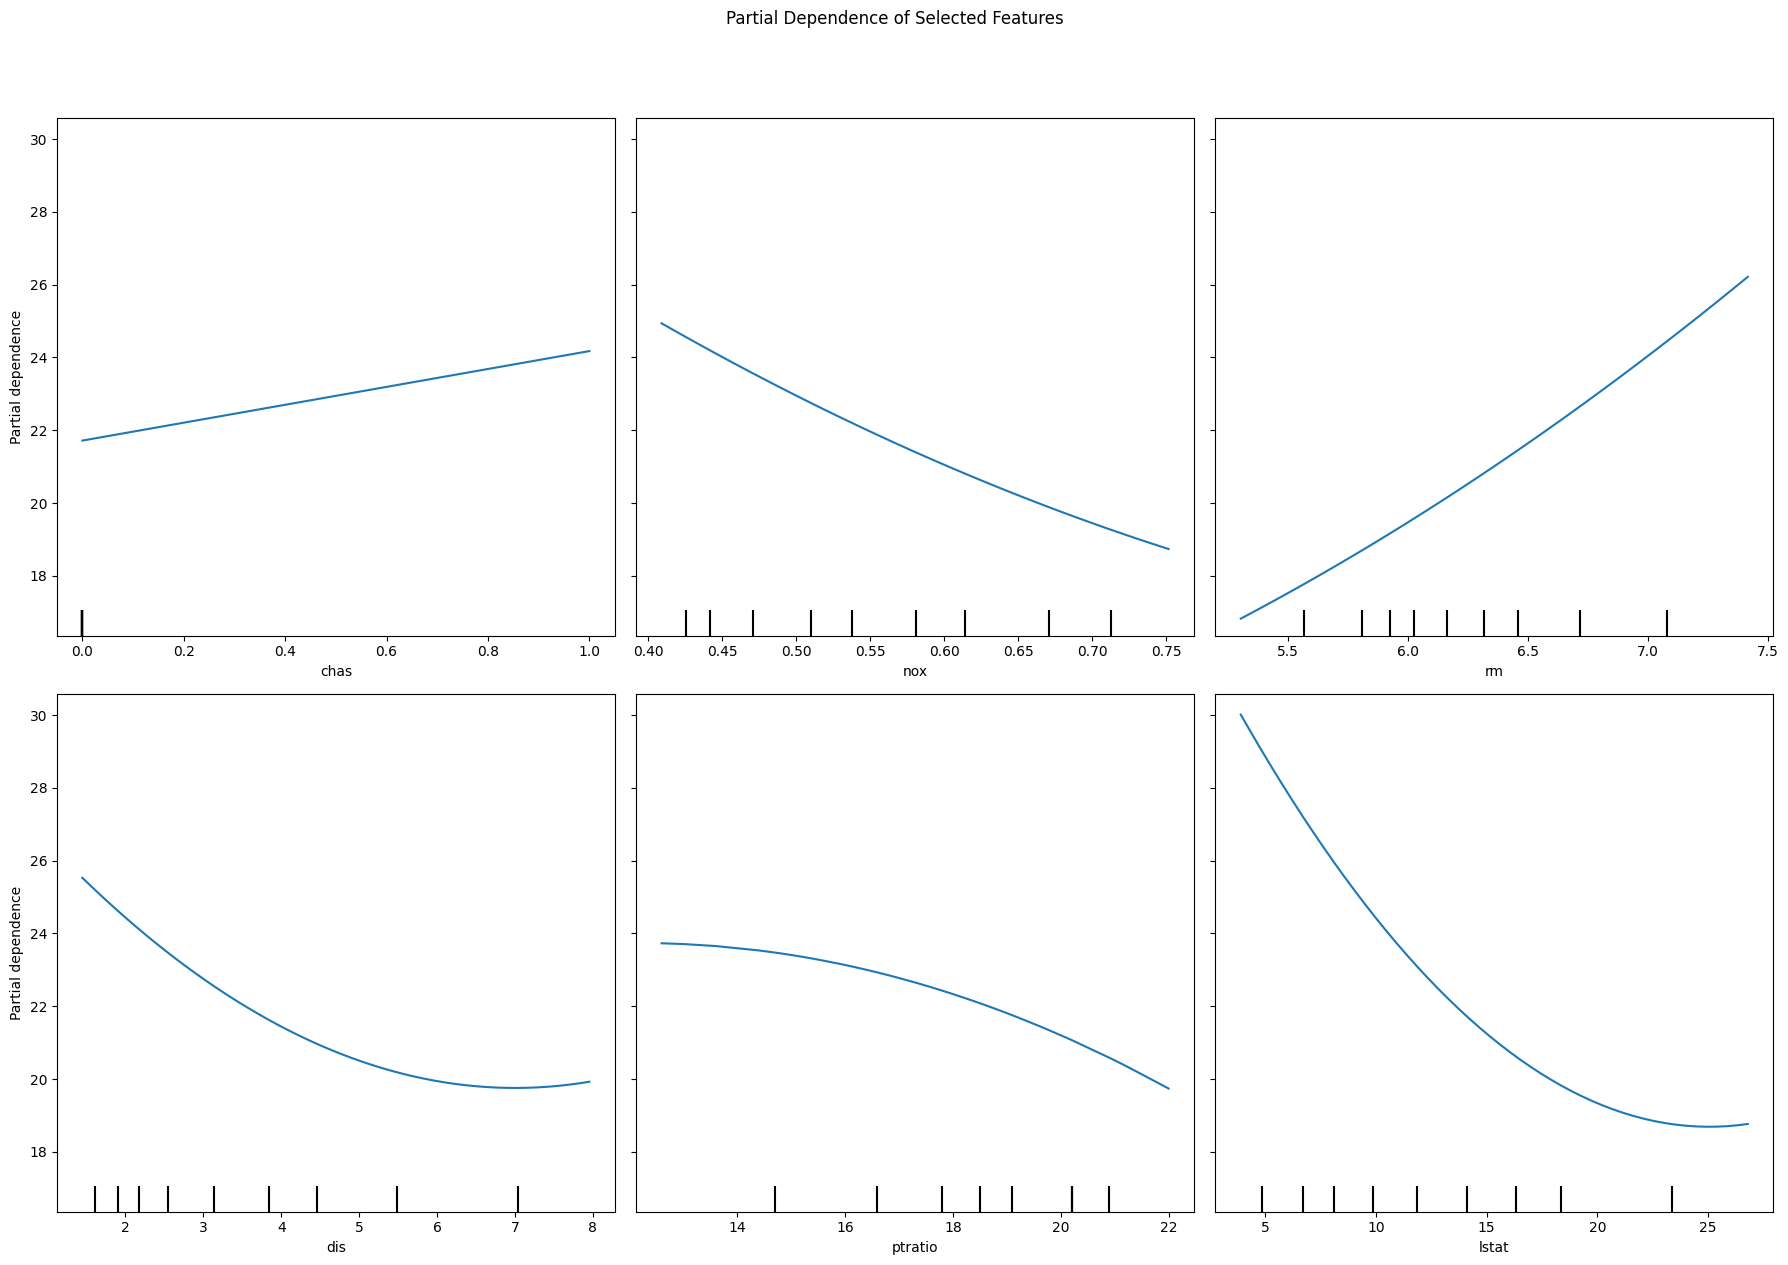

In [22]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Get feature names for better labeling (if available)
feature_names = data.drop('medv', axis=1).columns.tolist()

# Select top 6 features used by RFE
rfe = pipeline.named_steps['rfe']
selected_feature_mask = rfe.get_support()
selected_feature_names = [feature_names[i] for i, val in enumerate(selected_feature_mask) if val]

# Create a figure with custom size
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjust rows/cols based on how many features you're plotting

# Plot partial dependence using the created axes
display = PartialDependenceDisplay.from_estimator(
    pipeline,
    X_train,
    features=selected_feature_names,  # You can also use indices like [0, 1, 2,...]
    feature_names=feature_names,
    n_jobs=-1,
    grid_resolution=50,
    ax=axes  # Pass the pre-created axes here
)

plt.suptitle("Partial Dependence of Selected Features", y=1.05)  # Add some space at the top
plt.tight_layout()
plt.show()

Analyzing Model Performance
In this section of the exercise, you'll take a look at several models' learning and testing performances on training data.

Learning Curves
The following pricture shows four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Answer the following question.

Question: Learning the Data
For each of the above situations answer the following questions:

is it High Bias, High Variance or Ideal
is it usefull to add more data?

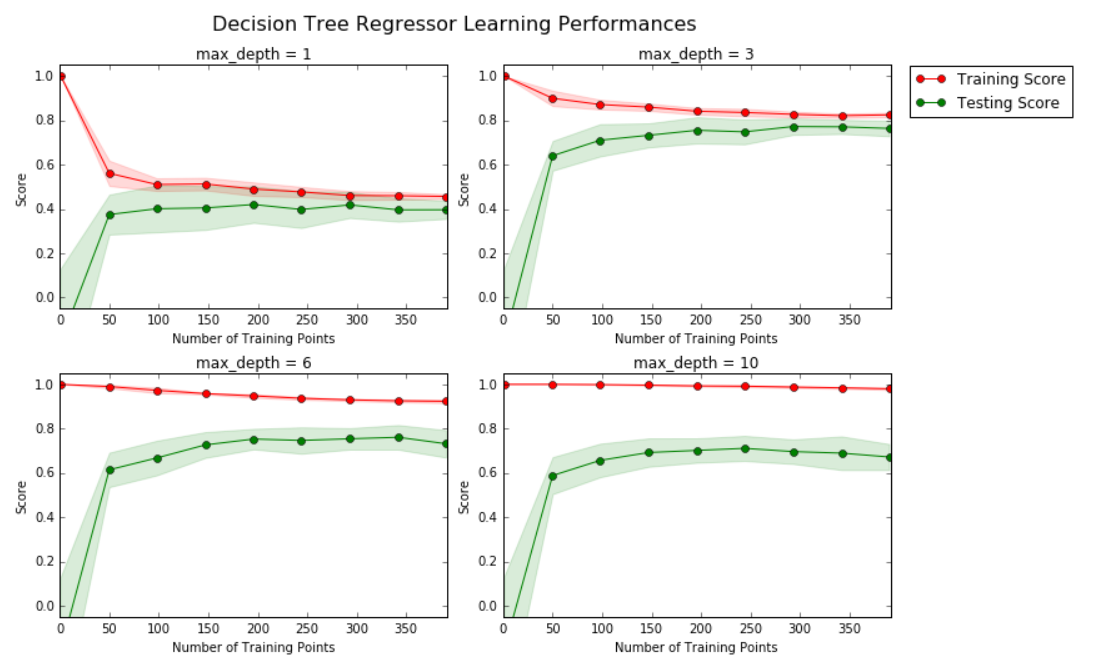


تحليل كل رسم بياني والإجابة على الأسئلة:

الرسم البياني الأول: Max Depth = 1

تحليل: في هذا الرسم، نلاحظ أن منحنى التدريب ومنحنى الاختبار كلاهما عند مستوى أداء منخفض جداً وقريبان جداً من بعضهما البعض. هذا يشير إلى أن النموذج بسيط للغاية وغير قادر على تعلم الأنماط في البيانات بشكل فعال، حتى مع زيادة حجم بيانات التدريب.
الإجابة:
is it High Bias, High Variance or Ideal: High Bias (تحيز عالي / Underfitting)
is it usefull to add more data?: No (لا) - لأن المشكلة تكمن في بساطة النموذج وليس في نقص البيانات.
الرسم البياني الثاني: Max Depth = 3

تحليل: في هذا الرسم، نرى أن أداء التدريب أعلى من أداء الاختبار وهناك فجوة، لكن الفجوة ليست كبيرة جداً. مع زيادة حجم البيانات، يتجه المنحنيان للتقارب عند مستوى أداء جيد نسبياً مقارنة بالحالة السابقة. هذا يشير إلى أن النموذج يتعلم الأنماط العامة بشكل جيد مع وجود درجة معقولة من التعميم.
الإجابة:
is it High Bias, High Variance or Ideal: Ideal (مثالي / توازن جيد)
is it usefull to add more data?: Might be slightly useful (قد يكون مفيداً بشكل طفيف) - لأن النموذج يتعلم بشكل جيد بالفعل، وقد لا تؤدي البيانات الإضافية إلى تحسن كبير جداً مقارنة بتحسين النموذج نفسه.
الرسم البياني الثالث: Max Depth = 6

تحليل: هنا، أداء التدريب مرتفع جداً، وهناك فجوة واضحة وملموسة بينه وبين أداء الاختبار، خاصة عند أحجام بيانات التدريب الصغيرة والمتوسطة. مع زيادة البيانات، تقل الفجوة بعض الشيء، لكنها لا تزال موجودة. هذا يدل على أن النموذج يبدأ في تعلم بعض الضوضاء من بيانات التدريب.
الإجابة:
is it High Bias, High Variance or Ideal: High Variance (تشتت عالي / Overfitting)
is it usefull to add more data?: Yes (نعم) - إضافة المزيد من البيانات يمكن أن يساعد في تقليل Overfitting وتحسين قدرة النموذج على التعميم.
الرسم البياني الرابع: Max Depth = 10

تحليل: في هذا الرسم، أداء التدريب مرتفع جداً وقريب جداً من القيمة القصوى (R²=1)، بينما أداء الاختبار منخفض بشكل ملحوظ وهناك فجوة كبيرة جداً وواضحة بين المنحنيين على كامل نطاق أحجام بيانات التدريب. هذا يشير إلى أن النموذج معقد جداً ويتعلم الضوضاء من بيانات التدريب بشكل مفرط، مما يؤدي إلى ضعف أداءه على بيانات الاختبار.
الإجابة:
is it High Bias, High Variance or Ideal: High Variance (تشتت عالي / Significant Overfitting)
is it usefull to add more data?: Yes (نعم) - إضافة المزيد من البيانات هو أحد الطرق الفعالة لتقليل Overfitting في هذه الحالة.

Model Selection and Evaluation
In this final section of the exercise, you will construct a multible model and make a prediction on the client's feature set using different learning models.

Grid Search on Decsion Tree Model
Train a the same pipline but using the decision tree model. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize:

'max_depth' parameter for the DecisionTreeRegressor, values range form 1 to 11 .
'n_features_to_select' parameter for the RFE, values range form 4 to 9 .
'degree' parameter for the PolynomialFeatures, values range form 1 to 11 .
what are the best params?
what the best score (mse)?

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# Create the pipeline
pipeline = make_pipeline(
    PolynomialFeatures(include_bias=False),
    MinMaxScaler(),
    RFE(DecisionTreeRegressor(random_state=42)),
    DecisionTreeRegressor(random_state=42)
)

# Define parameter grid
param_grid = {
    'polynomialfeatures__degree': range(1, 11),               # degree from 1 to 10
    'rfe__n_features_to_select': range(4, 9),                  # n_features_to_select from 4 to 8
    'decisiontreeregressor__max_depth': range(1, 11)           # max_depth from 1 to 10
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score (negative):", grid_search.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


Ensemble Model: AdaBoostRegressor
fit and evaluate a the same pipline but using the AdaBoostRegressor. with n_estimators set to 100 (( RFE'sn_features_to_select is 6 ) PolynomialFeatures's degree is 2)

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline

# Base estimator for AdaBoost (Decision Tree)
base_tree = DecisionTreeRegressor(max_depth=2, random_state=42)

# Create pipeline with RFE, Polynomial Features, Scaling and AdaBoost Regressor
pipeline_adaboost = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    MinMaxScaler(),
    RFE(base_tree, n_features_to_select=6),  # Select top 6 features
    AdaBoostRegressor(estimator=base_tree, n_estimators=100, random_state=42)
)

# Fit the model on training data
pipeline_adaboost.fit(X_train, y_train)

# Predict on train and test sets
y_train_pred = pipeline_adaboost.predict(X_train)
y_test_pred = pipeline_adaboost.predict(X_test)

# Evaluate performance
fit_and_evaluate_model(pipeline_adaboost, X_train, X_test, y_train, y_test)

Training Set Performance:
	Mean Squared Error (MSE): 21.9155
	R² Score: 0.7152

Testing Set Performance:
	Mean Squared Error (MSE): 31.4647
	R² Score: 0.6991

Full Dataset Prediction Performance (using test predictions):
⚠️ Warning: Cannot compare y_test_pred with full y unless shapes match.


(array([20.94657534, 20.56865672, 16.92857143, 21.3890625 , 20.56865672,
        17.53870968, 31.83      , 28.35      , 14.02833333, 21.06489362,
        21.3890625 , 30.23346457, 21.3890625 , 14.02833333, 16.92857143,
        20.56865672, 14.08571429, 20.94657534, 39.80418251, 31.83451777,
        20.94657534, 14.02833333, 19.982     , 30.68975265, 14.02833333,
        21.06489362, 21.3890625 , 28.99411765, 28.84964029, 14.02833333,
        36.39634146, 37.63928571, 14.08571429, 30.23346457, 30.23346457,
        30.23346457, 14.02833333, 14.02833333, 28.99411765, 14.02833333,
        14.08571429, 20.56865672, 14.02833333, 14.02833333, 36.39634146,
        28.99411765, 25.45980392, 21.06489362, 17.91586207, 20.48198198,
        36.39634146, 21.06489362, 14.02833333, 21.06489362, 28.35      ,
        14.02833333, 14.02833333, 28.89444444, 14.02833333, 14.08571429,
        18.70238095, 17.53870968, 33.15587045, 21.3890625 , 30.68975265,
        14.02833333, 28.35      , 14.02833333, 30.2

now let's choose the best degree for PolynomialFeatures by ploting the validation_curve using degree range up to 7. what is the optimal degree? is it your best model?

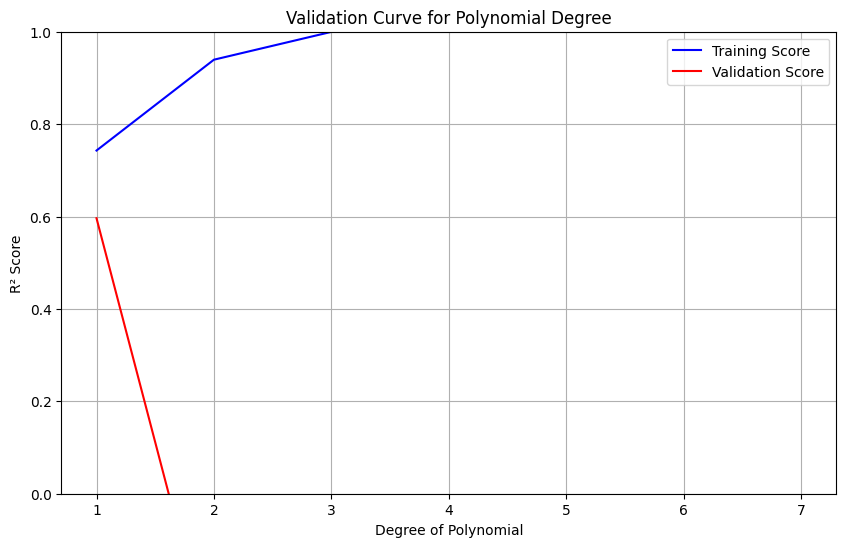

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Create a pipeline with PolynomialFeatures + Linear Regression
def PolynomialRegression(degree):
    return make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )

# Define degree range
degree = np.arange(1, 8)  # Up to 7 as requested

# Generate validation curve (using R² score by default)
train_scores, val_scores = validation_curve(
    estimator=PolynomialRegression(degree=1),  # Dummy model to get structure
    X=X,
    y=y,
    param_name="polynomialfeatures__degree",
    param_range=degree,
    scoring="r2",
    cv=7,
    n_jobs=-1
)

# Take median scores across cross-validation folds
train_scores_median = np.median(train_scores, axis=1)
val_scores_median = np.median(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(degree, train_scores_median, color='blue', label='Training Score')
plt.plot(degree, val_scores_median, color='red', label='Validation Score')

plt.title("Validation Curve for Polynomial Degree")
plt.xlabel("Degree of Polynomial")
plt.ylabel("R² Score")
plt.legend(loc='best')
plt.ylim(0, 1)
plt.grid(True)
plt.show()